In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import finplot as fplt

from Indicator import Indicator

def fillindicator(df):
    indicator = Indicator()
    train_set = indicator.MACD(df,12,26,9,1)
    train_set = indicator.DMI(df,14)
    train_set = indicator.AROON(df)
    train_set = indicator.ATR(df)
    train_set = indicator.CCI(df)
    train_set = indicator.OBV(df)
    return train_set

In [9]:
start = datetime.datetime(2019,10,1)#26 day before start year for make indicator
end = datetime.datetime(2021,1,1)

In [24]:
stock = 'AMD'
df = web.DataReader(stock,'yahoo',start,end)
df = fillindicator(df)
df = df.iloc[61:]

C:\Users\jame_\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\jame_\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [25]:
df['signal'] = 0
df.loc[((df['MACD-1']>df['SIGNAL LINE1'])&(df['MACD-1'].shift()<df['SIGNAL LINE1'].shift())),'signal'] = 1
df.loc[((df['MACD-1']<df['SIGNAL LINE1'])&(df['MACD-1'].shift()>df['SIGNAL LINE1'].shift())),'signal'] = 2

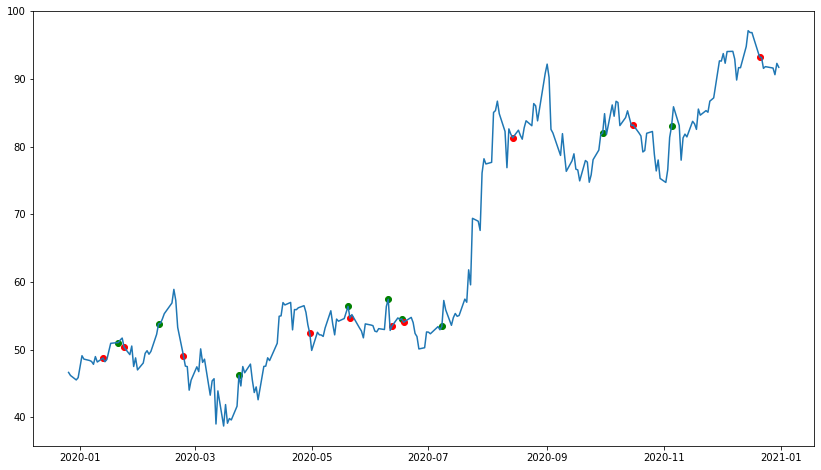

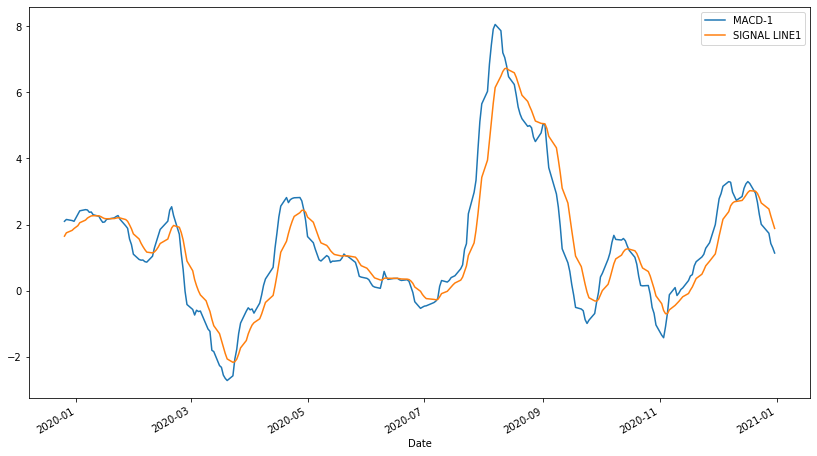

In [26]:
plt.figure(figsize=(14,8))
plt.plot(df.index,df['Close'])

prd = []
for i ,row in df.iterrows():
    if row['signal']==1:
        plt.scatter(x=i, y=row['Close'], c='green')
        prd.append(('buy',row['Close']))
    elif row['signal']==2:
        plt.scatter(x=i, y=row['Close'], c='red')
        prd.append(('sell',row['Close']))
df[['MACD-1','SIGNAL LINE1']].plot(figsize=(14,8))
plt.show()

In [28]:
if prd[0][0]=='sell':
    del prd[0]
if len(prd) %2!=0:
    del prd[-1]
prd

[('buy', 51.04999923706055),
 ('sell', 50.349998474121094),
 ('buy', 53.79999923706055),
 ('sell', 49.119998931884766),
 ('buy', 46.220001220703125),
 ('sell', 52.38999938964844),
 ('buy', 56.38999938964844),
 ('sell', 54.650001525878906),
 ('buy', 57.439998626708984),
 ('sell', 53.5),
 ('buy', 54.54999923706055),
 ('sell', 54.040000915527344),
 ('buy', 53.43000030517578),
 ('sell', 81.30000305175781),
 ('buy', 81.98999786376953),
 ('sell', 83.16999816894531),
 ('buy', 83.0),
 ('sell', 93.2300033569336)]

In [32]:
money =100000
b = []
s = []
MACD = []
for i in prd:
    if i[0] =='buy':
        b.append(i[1])
    else:
        s.append(i[1])
macdbuy = len(b)
macdsell = len(s)
pfmacd= []
profitmacd = []
for i in range(len(b)):
    pfmacd.append(((s[i]-b[i])/(b[i]))*money)
    profitmacd.append(((s[i]-b[i])/(b[i])))
pfmacd = sum(pfmacd)
MACD.append([stock,(sum(profitmacd)/macdbuy)*100,macdbuy,pfmacd])

In [34]:
MACD

[['AMD', 6.480602534047221, 9, 58325.42280642499]]